In [5]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import math
import matplotlib.pyplot as plt

In [3]:
# Reading necessary data
trainDf = pd.read_csv(r'.\data\train.csv')
testDf =  pd.read_csv(r'.\data\test.csv')

<AxesSubplot: xlabel='Id', ylabel='Code'>

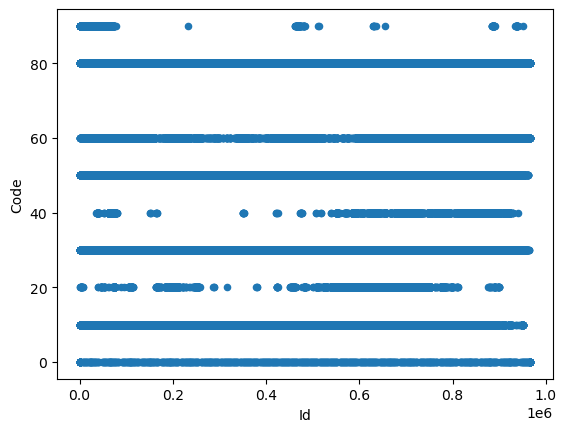

In [7]:
trainDf.plot.scatter('Id','Code')

<AxesSubplot: xlabel='Id', ylabel='Red'>

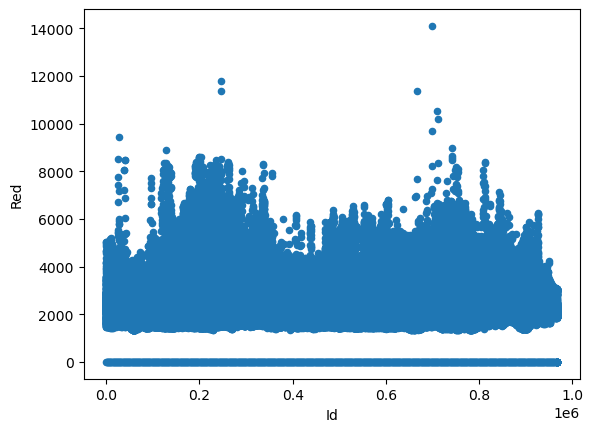

In [8]:
trainDf.plot.scatter('Id','Red')

<AxesSubplot: xlabel='Id', ylabel='Green'>

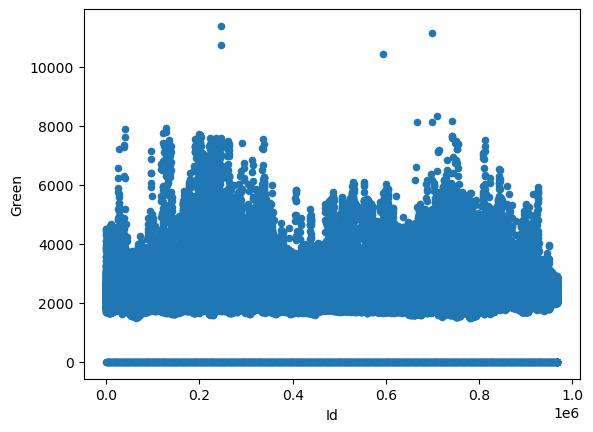

In [9]:
trainDf.plot.scatter('Id','Green')

<AxesSubplot: xlabel='Id', ylabel='Blue'>

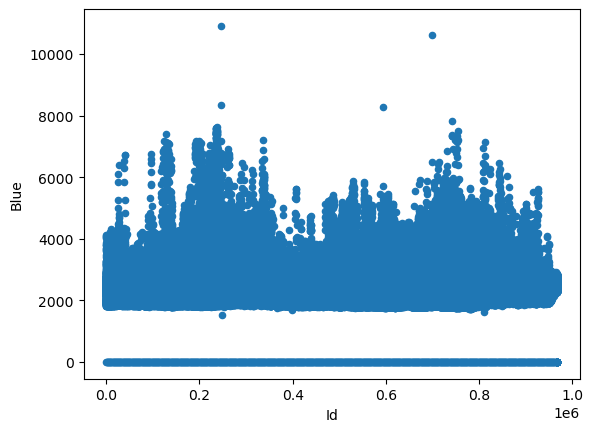

In [10]:
trainDf.plot.scatter('Id','Blue')

<AxesSubplot: xlabel='Id', ylabel='NIR'>

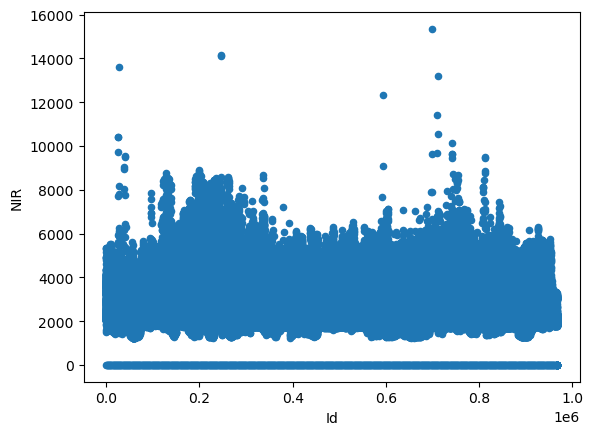

In [11]:
trainDf.plot.scatter('Id','NIR')

In [15]:
trainDf.dropna()

trainDf= trainDf[trainDf['Code'] != 0]
trainDf= trainDf[trainDf['Red'] != 0]
trainDf= trainDf[trainDf['Green'] != 0]
trainDf= trainDf[trainDf['Blue'] != 0]
trainDf= trainDf[trainDf['NIR'] != 0]

trainDf["Red"] = trainDf["Red"]/10000
trainDf["Green"] = trainDf["Green"]/10000
trainDf["Blue"] = trainDf["Blue"]/10000
trainDf["NIR"] = trainDf["NIR"]/10000

trainDf["NDVI"] = (trainDf["NIR"]-trainDf["Red"])/(trainDf["NIR"]+trainDf["Red"])
trainDf["NDWI"] = (trainDf["Green"]-trainDf["NIR"])/(trainDf["Green"]+trainDf["NIR"])


testDf["Red"] = testDf["Red"]/10000
testDf["Green"] = testDf["Green"]/10000
testDf["Blue"] = testDf["Blue"]/10000
testDf["NIR"] = testDf["NIR"]/10000

testDf["NDVI"] = (testDf["NIR"]-testDf["Red"])/(testDf["NIR"]+testDf["Red"])
testDf["NDWI"] = (testDf["Green"]-testDf["NIR"])/(testDf["Green"]+testDf["NIR"])

X_train = trainDf[['Blue','Green','Red','NIR','NDVI','NDWI']]
Y_train = trainDf[['Code']].values.ravel()
testDf = testDf.fillna(0)
X_train = X_train.fillna(0)

# KNN

In [13]:
# K-Neighbours Classifier
def knn_classifier(k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    return clf


def find_best_n_knn(clf,x,y):
    scores = {0:0}
    extendedScores = {}
    bestScores = []
    i = 1
    while True:
        score = cross_val_score(clf(i), x, y, cv=5, scoring='f1_macro')
        score = np.average(score)
        scores[i] = float("%.2f" % score)
        if scores[i] <= scores[i-1]:
            break
        i += 1

    for j in range(i,i+math.ceil(i/2)):
        score = cross_val_score(clf(j), x, y, cv=5, scoring='f1_macro')
        score = np.average(score)
        extendedScores[j] = float("%.2f" % score)


    scores.update(extendedScores)
    print(scores)

    return max(scores, key=scores.get)

def predict_knn(clf, x, y, x_predict):
    clf.fit(x, y)
    predictions = clf.predict(x_predict)
    df = pd.DataFrame(predictions)
    df.index.name  = 'Id'
    df.columns=['Code']
    # Export the DataFrame as a CSV file
    df.to_csv('knn_submission.csv')

In [ ]:
n = find_best_n_knn(knn_classifier,X_train,Y_train)
predict_knn(knn_classifier(n),X_train,Y_train,testDf)

# Hist Gradient Boosting

In [12]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(max_iter=300)
clf = clf.fit(X_train, Y_train)

predictions = clf.predict(testDf[['Blue','Green','Red','NIR','NDVI','NDWI']])
df = pd.DataFrame(predictions)
df.index.name  = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('histgradientboosting_submission.csv')

# Random Forest Without NDVI and NDWI

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=131, random_state=42)
clf = clf.fit(X_train[['Blue','Green','Red','NIR']], Y_train)

predictions = clf.predict(testDf[['Blue','Green','Red','NIR']])
df = pd.DataFrame(predictions)
df.index.name  = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('randomforest_submission.csv')

# SVC OneVsRest

In [14]:
# import multiprocessing
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC,LinearSVC
#
# clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), n_jobs=-1)
#
# clf = clf.fit(X_train, Y_train)
#
# predictions = clf.predict(testDf)
# df = pd.DataFrame(predictions)
# df.index.name  = 'Id'
# df.columns=['Code']
# # Export the DataFrame as a CSV file
# df.to_csv('svc_submission.csv')

# SGDC

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=35)
clf = clf.fit(X_train[['Blue','Green','Red','NIR','NDVI','NDWI']], Y_train)

predictions = clf.predict(testDf[['Blue','Green','Red','NIR']])
df = pd.DataFrame(predictions)
df.index.name  = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('sgdc_submission.csv')

# Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf = clf.fit(X_train[['Blue','Green','Red','NIR','NDVI','NDWI']], Y_train)

predictions = clf.predict(testDf[['Blue','Green','Red','NIR']])
df = pd.DataFrame(predictions)
df.index.name  = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('gradient_submission.csv')

# Extra Trees

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf = clf.fit(X_train[['Blue','Green','Red','NIR','NDVI','NDWI']], Y_train)

predictions = clf.predict(testDf[['Blue','Green','Red','NIR']])
df = pd.DataFrame(predictions)
df.index.name  = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('extra_submission.csv')

# Nearest Centroid Neighbour Classifier

In [9]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf = clf.fit(X_train[['Blue','Green','Red','NIR','NDVI','NDWI']], Y_train)

predictions = clf.predict(testDf[['Blue','Green','Red','NIR']])
df = pd.DataFrame(predictions)
df.index.name  = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('near_submission.csv')

# Random Forest With NDVI NDWI

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X_train[['Blue','Green','Red','NIR','NDVI','NDWI']], Y_train)

predictions = clf.predict(testDf[['Blue','Green','Red','NIR','NDVI','NDWI']])
df = pd.DataFrame(predictions)
df.index.name  = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('randomforestndvı_submission.csv')

# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf = clf.fit(X_train[['Blue','Green','Red','NIR','NDVI','NDWI']], Y_train)

predictions = clf.predict(testDf[['Blue','Green','Red','NIR','NDVI','NDWI']])
df = pd.DataFrame(predictions)
df.index.name  = 'Id'
df.columns=['Code']
# Export the DataFrame as a CSV file
df.to_csv('adaboost_submission.csv')